# Praktikum 3: Clustering

---

# Aufgabe 1: K-Means Clustering und Visualisierung

**Ziel**: Verstehen und Anwenden von K-Means Clustering auf einen Datensatz und Visualisieren der Ergebnisse.

**Aufgabenübersicht**:

1. **Datenvorverarbeitung**:
   - Ladet den bereitgestellten Datensatz.
   - Auswahl der Features.
   - Standardisiert die für das K-Means-Clustering geeigneten Merkmale.

2. **K-Means-Clustering**:
   - Wendet den K-Means-Algorithmus auf den Datensatz an. Wählt eine geeignete Anzahl von Clustern (k) und begründet eure Wahl.
   - Weist jedem Datenpunkt Cluster-Labels zu.

3. **Pairplot-Analyse**:
   - Erstellt ein `pairplot` mit `seaborn`, um die Verteilung der Merkmale des Datensatzes innerhalb der Cluster zu visualisieren.
   - Identifiziert alle offensichtlichen Beziehungen oder Korrelationen zwischen den Merkmalen innerhalb und zwischen den Clustern.

4. **Analyse und Reflexion**:
   - Verfasst eine kurze Analyse der Clustering-Ergebnisse. Diskutiert alle in den Clustern beobachteten Muster oder Erkenntnisse.
   - Denkt über die Effektivität des K-Means-Algorithmus bei der Analyse dieses Datensatzes nach.

In [1]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## 1. Datenvorverarbeitung

### 1.1 Daten laden

In [2]:
# TODO: Hier soll euer Code stehen.

In [3]:
# Diese Zelle nicht ausführen sonst verschwindet der Output!

,Unnamed: 0,published_at,channel,title,duration,caption,licensed_content,projection,trend_time_hours,weekday,...,best_rank,views_growth,views_growth/hour,views_cleaned,likes_cleaned,dislikes_cleaned,comments_cleaned,category_name,duration_category,day_of_week
0,2,2021-04-03 13:00:14+00:00,Brawl Stars,"Brawl Stars: Brawl Talk! Two New Brawlers, TON...",255,True,True,rectangular,26.125556,0,...,3,3051500,116801.343937,20797544,940030.0,11778.0,114130.0,Gaming,0-5 min,Saturday
1,7,2021-04-04 21:57:24+00:00,Technoblade,"I Must Win MrBeast's $10,000 Refrigerator",788,False,True,rectangular,76.758889,0,...,1,4036487,52586.574121,6988056,594257.0,3372.0,30740.0,Gaming,10-15 min,Sunday
2,9,2021-04-03 18:58:05+00:00,ELoTRiX - Clips,ROLEX von UNSYMPATHISCHTV GESCHENKT BEKOMMEN -...,238,False,True,rectangular,0.477778,0,...,10,1724,3608.372093,220157,16823.0,159.0,494.0,Gaming,0-5 min,Saturday
3,19,2021-04-04 19:00:00+00:00,Grian,Hermitcraft 7: Episode 73 - C.E.O of BARGE Co.,1374,False,True,rectangular,50.442222,0,...,3,678741,13455.810829,1983417,119843.0,807.0,21864.0,Gaming,20-25 min,Sunday
4,24,2021-04-04 18:14:54+00:00,MrBeast Gaming,Hide And Seek Across The Earth!,589,False,True,rectangular,69.658889,0,...,6,6372900,91487.247380,14851126,697718.0,9338.0,50360.0,Gaming,5-10 min,Sunday


### 1.2 Features auswählen

Für unsere Analyse verwenden wir die folgenden Merkmale: `duration`, `views_growth`, `likes_cleaned`, `dislikes_cleaned`, `comments_cleaned`. Diese repräsentieren verschiedene Aspekte der Video-Engagement-Daten.

In [4]:
# TODO: Hier soll euer Code stehen.

In [5]:
# Diese Zelle nicht ausführen sonst verschwindet der Output!

,duration,views_growth,likes_cleaned,dislikes_cleaned,comments_cleaned
0,255,3051500,940030.0,11778.0,114130.0
1,788,4036487,594257.0,3372.0,30740.0
2,238,1724,16823.0,159.0,494.0
3,1374,678741,119843.0,807.0,21864.0
4,589,6372900,697718.0,9338.0,50360.0


### 1.3 Daten standardisieren

Da K-Means von der Skalierung der Daten beeinflusst wird, müsst ihr die Daten standardisieren, um sicherzustellen, dass jedes Merkmal gleich gewichtet wird. Verwendet `StandardScaler` aus der `sklearn.preprocessing` Bibliothek, um die ausgewählten Merkmale zu standardisieren.

In [6]:
# TODO: Hier soll euer Code stehen.

In [7]:
# Diese Zelle nicht ausführen sonst verschwindet der Output!

array([[-0.71174586,  1.19097261,  5.03566024,  2.94984866,  7.13646551],
       [ 0.01610452,  1.71201276,  2.96966678,  0.52385359,  1.5975278 ],
       [-0.7349606 , -0.42230324, -0.48050103, -0.40342718, -0.4114746 ],
       ...,
       [-1.0230965 , -0.42032802, -0.50197517, -0.40660182, -0.44030179],
       [-0.30343955, -0.41891353, -0.53594902, -0.41352828, -0.42588819],
       [-0.84830316, -0.38074168,  0.75297188, -0.19765339,  0.32554486]])

## 2. K-Means-Clustering

### 2.1 Anwendung der Ellbogen-Methode

- Die "Inertia" stellt die Summe der Quadrate innerhalb der Cluster dar, die tendenziell abnimmt, wenn die Anzahl der Cluster erhöht wird. Eine gängige Methode zur Bestimmung der optimalen Anzahl von Clustern ist die Ellbogen-Methode, bei der nach einem Punkt im Plot gesucht wird, an dem sich die Abnahmerate stark verändert und einem "Ellbogen" ähnelt.
- Führt die K-Means-Clustering-Methode auf den standardisierten Daten durch.
- Testet verschiedene Werte für k und berechnet die inertia.
- Plottet die berechneten Werte.

In [8]:
# TODO: Hier soll euer Code stehen.

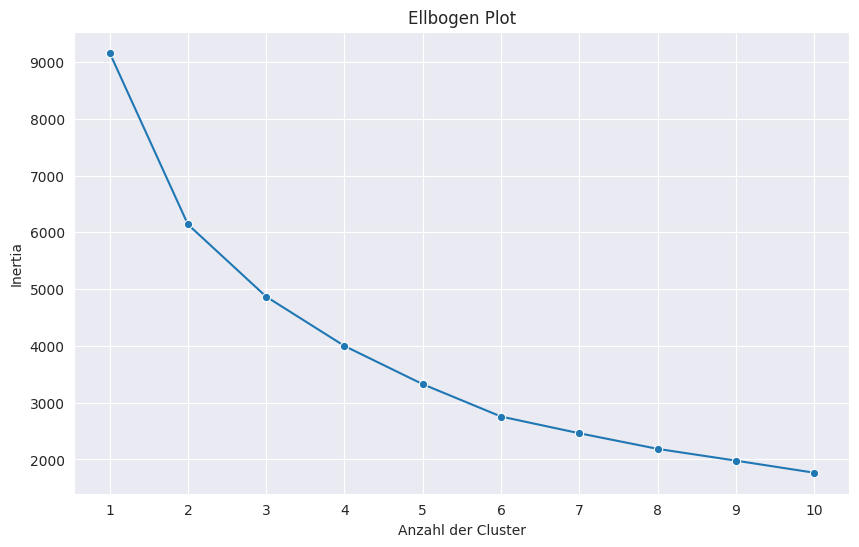

In [9]:
# Diese Zelle nicht ausführen sonst verschwindet der Output!

### 2.2 Anzahl der Cluster bestimmen

- Wählt eine geeignete Anzahl von Clustern (k) anhand des Elbow-Diagrams und begründet eure Wahl.
- Hinweis: es gibt hier keine 100% richtige Antwort.
- Fahrt mit K-Means-Clustering unter Verwendung der gewählten Anzahl von Clustern fort.

In [10]:
# TODO: Hier soll euer Code stehen.

In [11]:
# Diese Zelle nicht ausführen sonst verschwindet der Output!

,Unnamed: 0,published_at,channel,title,duration,caption,licensed_content,projection,trend_time_hours,weekday,...,views_growth,views_growth/hour,views_cleaned,likes_cleaned,dislikes_cleaned,comments_cleaned,category_name,duration_category,day_of_week,Cluster
0,2,2021-04-03 13:00:14+00:00,Brawl Stars,"Brawl Stars: Brawl Talk! Two New Brawlers, TON...",255,True,True,rectangular,26.125556,0,...,3051500,116801.343937,20797544,940030.0,11778.0,114130.0,Gaming,0-5 min,Saturday,3
1,7,2021-04-04 21:57:24+00:00,Technoblade,"I Must Win MrBeast's $10,000 Refrigerator",788,False,True,rectangular,76.758889,0,...,4036487,52586.574121,6988056,594257.0,3372.0,30740.0,Gaming,10-15 min,Sunday,2
2,9,2021-04-03 18:58:05+00:00,ELoTRiX - Clips,ROLEX von UNSYMPATHISCHTV GESCHENKT BEKOMMEN -...,238,False,True,rectangular,0.477778,0,...,1724,3608.372093,220157,16823.0,159.0,494.0,Gaming,0-5 min,Saturday,1
3,19,2021-04-04 19:00:00+00:00,Grian,Hermitcraft 7: Episode 73 - C.E.O of BARGE Co.,1374,False,True,rectangular,50.442222,0,...,678741,13455.810829,1983417,119843.0,807.0,21864.0,Gaming,20-25 min,Sunday,0
4,24,2021-04-04 18:14:54+00:00,MrBeast Gaming,Hide And Seek Across The Earth!,589,False,True,rectangular,69.658889,0,...,6372900,91487.247380,14851126,697718.0,9338.0,50360.0,Gaming,5-10 min,Sunday,2


## 3. Pairplot-Analyse:

   - Erstellt ein `pairplot` mit `seaborn`, um die Verteilung der Merkmale des Datensatzes innerhalb der Cluster zu visualisieren.
   - Identifiziert alle offensichtlichen Beziehungen oder Korrelationen zwischen den Merkmalen innerhalb und zwischen den Clustern und beschreibt diese kurz.

In [12]:
# TODO: Hier soll euer Code stehen.

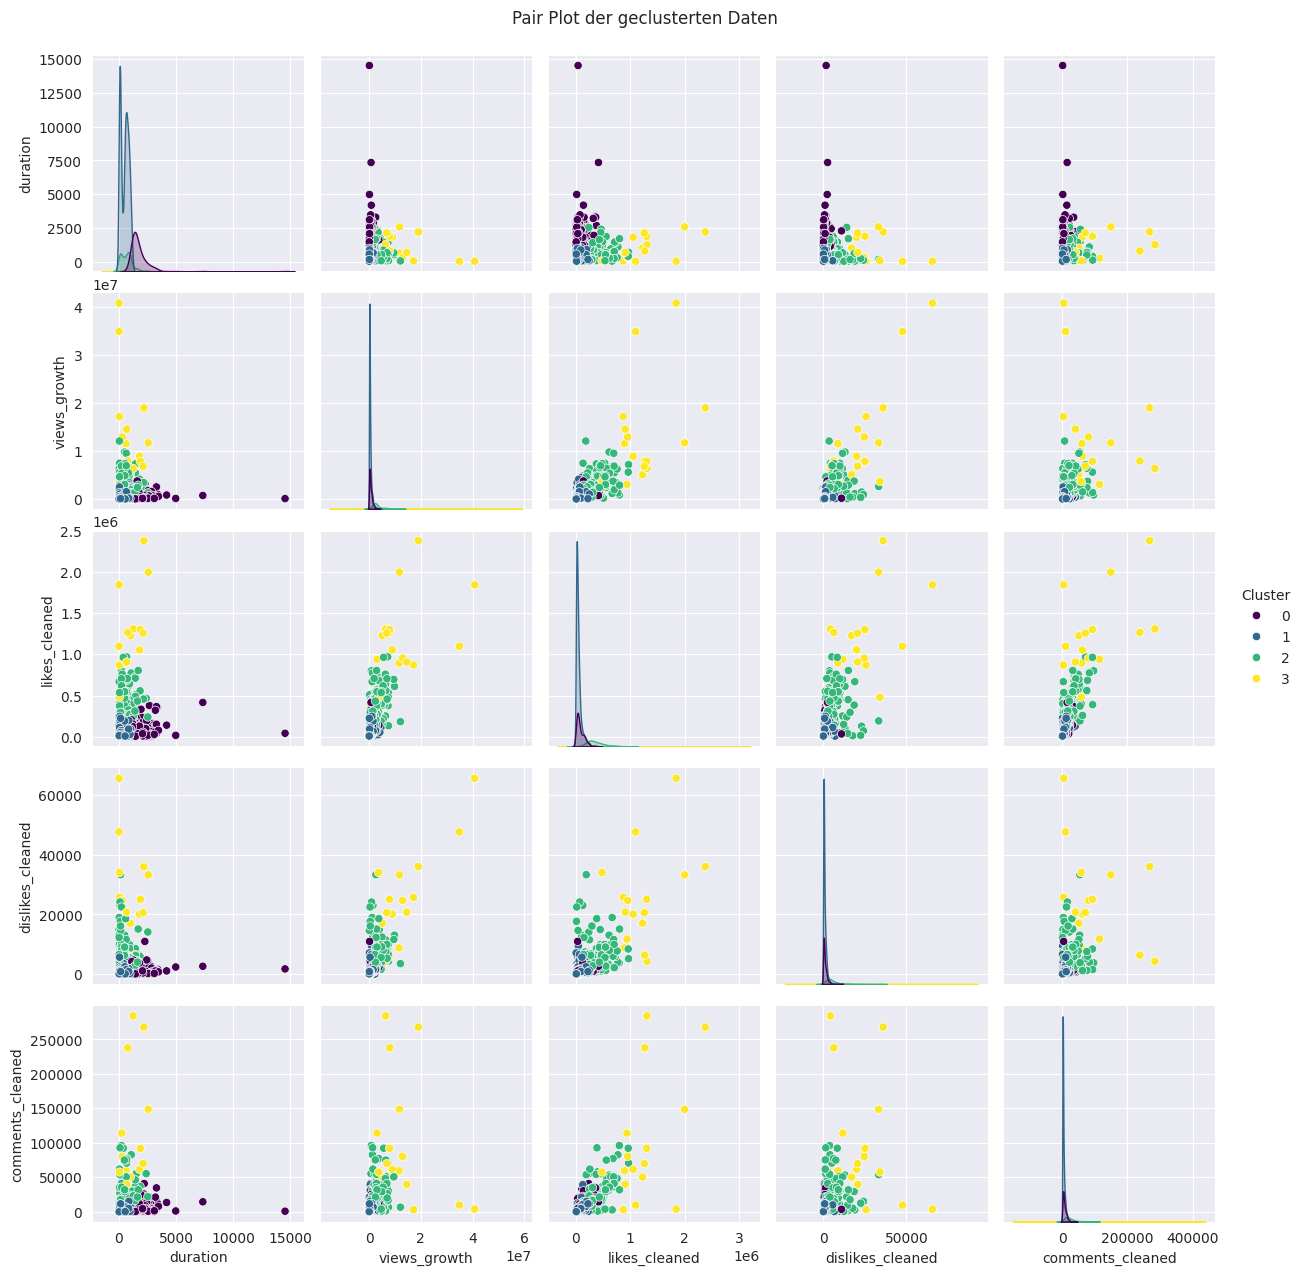

In [13]:
# Diese Zelle nicht ausführen sonst verschwindet der Output!